In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [4]:
# Collect 10 years of weekly data for McDonald’s, Coca Cola and Microsoft for the period January 1, 2011 to January 1, 2021

# Collect 10 years of weekly data for McDonald’s, Coca Cola and Microsoft for the period January 1, 2011 to January 1, 2021



df1 = yf.download('MCD', start='2011-01-01', end='2021-01-01', interval='1wk')
df2 = yf.download('KO', start='2011-01-01', end='2021-01-01', interval='1wk')
df3 = yf.download('MSFT', start='2011-01-01', end='2021-01-01', interval='1wk')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2010-12-27  76.709999  76.860001  76.339996  76.760002  55.194672   2485100.0
2011-01-03  77.099998  77.589996  73.589996  74.370003  53.476124  85384300.0
2011-01-10  74.250000  74.489998  72.139999  74.059998  53.253216  55458500.0
2011-01-17  74.650002  75.750000  74.309998  75.010002  53.936314  40041400.0
2011-01-24  74.250000  75.849998  73.050003  73.279999  52.692341  46718700.0

In [5]:
# calculate the weekly returns for each stock and store them in a new column in the data frame
df1['Weekly Return'] = df1['Adj Close'].pct_change()
df2['Weekly Return'] = df2['Adj Close'].pct_change()
df3['Weekly Return'] = df3['Adj Close'].pct_change()

In [7]:
#calculate the annualized mean and the covariance matrix for the returns of the three stocks
mean = df1['Weekly Return'].mean()*52
mean2 = df2['Weekly Return'].mean()*52
mean3 = df3['Weekly Return'].mean()*52
print(mean, mean2, mean3)

cov = df1['Weekly Return'].cov(df2['Weekly Return'])*52
cov2 = df1['Weekly Return'].cov(df3['Weekly Return'])*52
cov3 = df2['Weekly Return'].cov(df3['Weekly Return'])*52
print(cov, cov2, cov3)



0.13798403115422622 0.09280250638057279 0.23758947070014955
0.019222507027665314 0.01683508611730783 0.017287224588967233


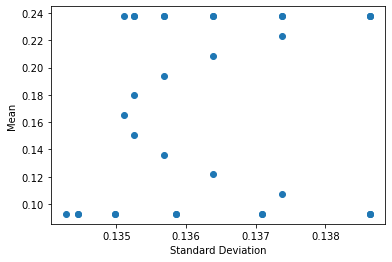

In [22]:
# create a forloop for all the portfolios weights "(0, 0, 1), (0, 0.1, 0.9), (0.1, 0.1, 0.8), . . . , (0.9, 0.1, 0), (1, 0, 0)" and calculate the annualized mean and standard-deviation of the portfolio

Mean = []
Std = []


for i in range(0, 11):
    w = np.array([i/10, (10-i)/10, 0])
    mean = np.dot(w, [mean, mean2, mean3])
    std = np.sqrt(np.dot(w.T, np.dot(np.array([[cov, cov2, cov3], [cov2, cov, cov3], [cov3, cov3, cov]]), w)))
    Mean.append(mean)
    Std.append(std)

# create a forloop for all the portfolios weights "(0, 0, 1), (0, 0.1, 0.9), (0.1, 0.1, 0.8), . . . , (0.9, 0.1, 0), (1, 0, 0)" and calculate the annualized mean and standard-deviation of the portfolio
for i in range(0, 11):
    w = np.array([i/10, 0, (10-i)/10])
    mean = np.dot(w, [mean, mean2, mean3])
    std = np.sqrt(np.dot(w.T, np.dot(np.array([[cov, cov2, cov3], [cov2, cov, cov3], [cov3, cov3, cov]]), w)))
    Mean.append(mean)
    Std.append(std)
# create a forloop for all the portfolios weights "(0, 0, 1), (0, 0.1, 0.9), (0.1, 0.1, 0.8), . . . , (0.9, 0.1, 0), (1, 0, 0)" and calculate the annualized mean and standard-deviation of the portfolio
for i in range(0, 11):
    w = np.array([0, i/10, (10-i)/10])
    mean = np.dot(w, [mean, mean2, mean3])
    std = np.sqrt(np.dot(w.T, np.dot(np.array([[cov, cov2, cov3], [cov2, cov, cov3], [cov3, cov3, cov]]), w)))
    Mean.append(mean)
    Std.append(std)


# plot the mean and standard deviation of the portfolio in a scatter plot

plt.scatter(Std, Mean)
plt.xlabel('Standard Deviation')
plt.ylabel('Mean')
plt.show()

# calculate the Sharpe ratio for each portfolio and plot the Sharpe ratio against the portfolio weights

Sharpe = []
for i in range(0, 33):
    Sharpe.append(Mean[i]/Std[i])

plt.scatter(Sharpe,Mean)
plt.xlabel('Sharpe Ratio')
plt.ylabel('Mean')
plt.show()










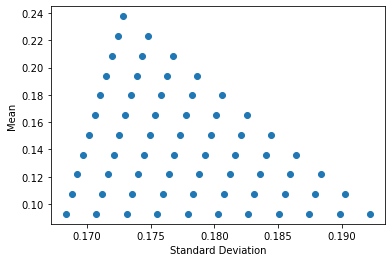

In [25]:
Mean = []
Std = []
for i in range(0, 11):
    for j in range(0, 11):
        for k in range(0, 11):
            if i + j + k == 10:
                Mean.append((mean*i + mean2*j + mean3*k)/10)
                Std.append(np.sqrt((cov*i + cov2*j + cov3*k)**2))

plt.scatter(Std, Mean)
plt.xlabel('Standard Deviation')
plt.ylabel('Mean')
plt.show()







In [7]:
# create a function that finds the efficient frontier with a given correlation coefficient between the two stocks and plot the efficient frontier

def efficient_frontier(corr):
    

ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)